# Classifying Crime: San Francisco Open Data
Crime data from 2003 to early 2015 has been published by the city/county of San Francisco (herein SF) by SF Opendata. Using indicators of time, location, and responding police districts, the task was to classify a reported crime.

## Useful Libraries, Scripts, and Other Imports

In [20]:
import crime
reload(crime)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## Loading the Data - Cleaning and Recoding

We first load and clean the data - replacing extraneous or erroneous longitude and latitude values with median locations based upon responding police district, breaking the timestamps into individual columns, turning category labels into category numbers to improve the performance of future models, and dropping redundant columns that were otherwise recoded.

In [13]:
train = crime.load_cleaned_train()
test = crime.load_cleaned_test()

# print train.info()
# print test.info()

During exploration, it was found that mapping crimes yielded a gridded type pattern when overlayed with the a map of San Francisco. Upon further inspection of the address column, we decided to add a flag to the data which captures whether or not a crime occured on a street corner. Further, we also measured across all years the most prevalent address locations on which crimes were reported, and encode the top two streets reported. The first street - the street on which most reports are addressed - turns out to be the street on which the courthouse is located within the city. Below, see an example of some crimes which are mapped. Note the number of crimes which appear to occur on a corner.

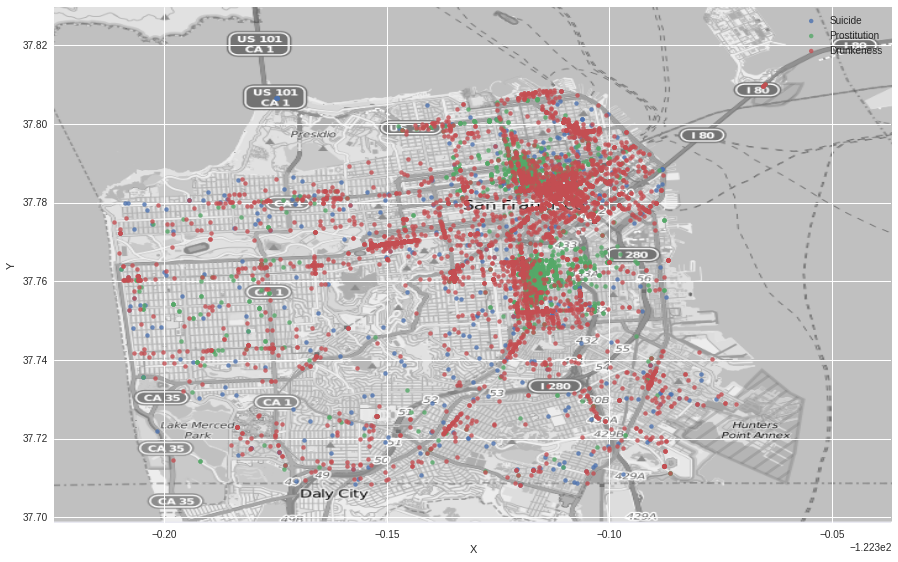

In [21]:
#Mapping an illustration of crime across all years to show the relative
#locations of interesting quantities, and the prevalence of 'corner crime'
#gridding.

#define plot information
plt.figure(figsize=(15,15))
plt.axis([-122.52469, -122.33663, 37.69862, 37.82986])

#get the map, downloaded to the working directory
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)

#map suicide, prostitution, and drunkenness
ax = sns.regplot(train[train.Category == 'SUICIDE'].X, train[train.Category == 'SUICIDE'].Y, fit_reg=False)
ax = sns.regplot(train[train.Category == 'PROSTITUTION'].X, train[train.Category == 'PROSTITUTION'].Y, fit_reg=False)
ax = sns.regplot(train[train.Category == 'DRUNKENNESS'].X, train[train.Category == 'DRUNKENNESS'].Y, fit_reg=False)

#display the plot
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
plt.legend(['Suicide', 'Prostitution', 'Drunkeness'])
plt.show()

## More Closely Examining SF Crime
With the emergence of SF as a technology haven within the last 12 years, crime has changed character and flavor within the city. Though the net number of crimes today has decreased from the net number of yesteryear, the changing fce of the SF population has brough with it a due amount of unrest. To explore how this manifested within the dataset, we look at the spatial, temporal, and the spatiotemportal relationships.

### Temporal

HYPOTHESIS: The major types of crime have likely stayed the same, but the most significant crimes today are different from those in the early 2000s.

In [22]:
#TODO insert Bar and Line graphs of major crimes by year here, make sure to normalize

TAKEAWAY: This hypothesis seems to hold true....[WILL WANT TO INSERT MORE INFO HERE]

Similarly, we wonder whether the time of the year holds any meaning to the types of crime which might be evident:

In [ ]:
#TODO insert perhaps some circle graphs of seasonal crime

Seasonal effects seem to be low, at best. When looking at San Francisco weather patterns, we might be able to claim that given the moderate climate, crime may not be dissuaded from particularly bad weather. Though one might think that tourist season may see a general rise in crime...[WILL WANT TO FINISH THIS THOUGHT].

HYPOTHESIS: Though seasonal changes might not matter, what about day to day? Certain types of crime will be more likely to be reported at unique times of day which may be mapped to either the time of crime discovery, or the time at which the perpetrator may have been caught.

In [24]:
#TODO Time and Day of week density maps here

TAKEAWAY: There does seem to be a strong relationship between time of day and the type of crime, with a secondary day of week relationship.

### Spatial
Now, let's look at some of those spatial relationships...

HYPOTHESIS: Different types of crime will localize in unique, dense, areas.

In [23]:
#TODO insert those density maps, but more nicely than what we presently have

TAKEAWAY: [WILL WANT TO INSERT MORE INFO HERE]

### Spatiotemporal
Given that the face of crime has changed, and there is certainly a relationship between location and crime type, we determine whether these factos together may yield some interesting relationships which could be exploited in model predictors.

HYPOTHESIS: Some crime locations have shifted over time, though potentially minimally, whereas others may be relatively new or have completely died as gentrification, tourism, and the technology boom took over the city.

In [25]:
#TODO Slider of density plots here

TAKEAWAY: [WILL WANT TO INSERT HERE]

## Classifying Crime
Given the relationships which were discovered, or assumed, we want to develop a set of predictors which have demonstrable relationships with crime types in order to test and train our model. The three model types which seem to be appropriate given the type of data being used are the Logistic Regression, Random Forest, and K Nearest Neighbors.